# 2019-nCov data exploration

# Context

From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

Johns Hopkins University has made an excellent dashboard using the affected cases data. This data is extracted from the same link and made available in csv format.

# Content

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

In [22]:
# import libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium
from folium import plugins

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina'

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8,5
#plt.rcParams['image.cmap'] = 'viridis'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Disable warnings
import warnings
warnings.filterwarnings('ignore')



New Coronvarius outbreak starting at Wuhan: A geographical analysis 
The current outbreak of new coronvirious first reported in Wuhan, China has caused international attention, as well as  hughe amount of fear around the world. The World Health Organization has declared the novel coronavirus outbreak a public health emergency. All provinces, including Taiwan, Hongkong and Macau, in China have been reported to have positive cases.  So far, more that 30 countries across four continents have been reported to have positive cases. The first death case outside Mainland China was reported in Phillipines. 

In [23]:
from IPython.display import IFrame
IFrame('https://www.myheatmap.com/maps/PPk1_rfT1jQ%3D', width=800, height=600)

In [24]:
# reading the dataset for 2019-nCov cases
data = pd.read_csv("/Users/lihua/2019-nCov/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv",)
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [25]:
# Explore the various columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
Sno               700 non-null int64
Date              700 non-null object
Province/State    536 non-null object
Country           700 non-null object
Last Update       700 non-null object
Confirmed         700 non-null float64
Deaths            700 non-null float64
Recovered         700 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 43.8+ KB


In [26]:
# Convert Last update column to datatime64 format

data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)

#Set Date column as the index column. 
#data.set_index('Last Update', inplace=True)
data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


# Countries affected by the 2019-nCov at present

In [27]:
# Let's check out which countries are affected. 

countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by 2019-nCov:", len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK']

Total countries affected by 2019-nCov: 31


# Present Condition (data cleaning)

I noticed that China and Mainland China are reported seperately. Let's combine cases. 

In [28]:
#Combine China and Mainland China cases
data['Country'].replace({'Mainland China':'China'}, inplace=True)
countries = data['Country'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus:", len(countries))


['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK']

Total countries affected by virus: 30


# Latest worldwide status 

In [29]:
d = data['Date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

from datetime import date
data_latest = data[data['Date'] > pd.Timestamp(date(year,month,day))]
data_latest.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
631,2020-02-03 21:40:00,Hubei,China,2020-04-02 01:23:00,13522.0,414.0,396.0
632,2020-02-03 21:40:00,Zhejiang,China,2020-04-02 01:43:00,829.0,0.0,48.0
633,2020-02-03 21:40:00,Guangdong,China,2020-04-02 01:43:00,797.0,0.0,21.0
634,2020-02-03 21:40:00,Henan,China,2020-04-02 01:23:00,675.0,2.0,20.0
635,2020-02-03 21:40:00,Hunan,China,2020-04-02 01:43:00,593.0,0.0,22.0


In [30]:
### Creating a dataframe with total number of cases for every country 
Number_of_countries = len(data_latest['Country'].value_counts())

cases = pd.DataFrame(data_latest.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index = np.arange(1, Number_of_countries+1)

global_cases = cases[['Country', 'Confirmed']]
#global_cases.sort_values(by=['Confirmed'], ascending=False)
global_cases


,Country,Confirmed
1,Australia,12.0
2,Cambodia,1.0
3,Canada,4.0
4,China,20400.0
5,Finland,1.0
6,France,6.0
7,Germany,12.0
8,Hong Kong,15.0
9,India,3.0
10,Italy,2.0


Let's create a new dataframe which consists of the latitudes and longitudes of the countries under observation. 

In [31]:
#Importing the world_coordinates dataset
world_coordinates = pd.read_csv("/Users/lihua/2019-nCov/input/novel-corona-virus-2019-dataset/world_coordinates.csv",)

# Merging the coordinates dataframe with the latest dataframe
world_data = pd.merge(world_coordinates, global_cases, on='Country')
world_data.head()


,Code,Country,latitude,longitude,Confirmed
0,AE,United Arab Emirates,24.0,54.0,5.0
1,AU,Australia,-27.0,133.0,12.0
2,CA,Canada,60.0,-95.0,4.0
3,CN,China,35.0,105.0,20400.0
4,DE,Germany,51.0,9.0,12.0


Visualizing the current world scenario

In [32]:
# Create a map and display it
world_map = folium.Map(location =[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['latitude'], world_data['longitude'], world_data['Confirmed'], world_data['Country']): 
    folium.CircleMarker([lat, lon], 
                        radius=10, 
                        popup = ('<strong>Country</strong>:' + str(name).capitalize() + '<br>'
                                 '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'), 
                        color = 'red', 
        
                        fill_color='red', 
                        fill_opacity=0.7).add_to(world_map)
world_map
#world_map.save('countries_affected.html')

In [33]:
# A look at different cases - confirmed, death and recovered
print('Globally Confirmed Cases: ',data_latest['Confirmed'].sum())
print('Global Deaths: ',data_latest['Deaths'].sum())
print('Globally Recovered Cases: ',data_latest['Recovered'].sum())

Globally Confirmed Cases:  20588.0
Global Deaths:  426.0
Globally Recovered Cases:  644.0


In [34]:
# Let's look at the various Provinces/States affected

data_latest.groupby(['Country', 'Province/State']).sum()

Confirmed  Deaths  Recovered
Country   Province/State                                
Australia New South Wales         4.0     0.0        2.0
          Queensland              2.0     0.0        0.0
          South Australia         2.0     0.0        0.0
          Victoria                4.0     0.0        0.0
Canada    British Columbia        1.0     0.0        0.0
          London, ON              1.0     0.0        0.0
          Toronto, ON             2.0     0.0        0.0
China     Anhui                 480.0     0.0       14.0
          Beijing               212.0     1.0       12.0
          Chongqing             337.0     2.0        9.0
          Fujian                179.0     0.0        1.0
          Gansu                  55.0     0.0        3.0
          Guangdong             797.0     0.0       21.0
          Guangxi               139.0     0.0        7.0
          Guizhou                56.0     0.0        2.0
          Hainan                 79.0     1.0        4.0
          Hebei                 126.0     1.0        3.0
          Heilongjiang          155.0     2.0        2.0
          Henan                 675.0     2.0       20.0
          Hubei               13522.0   414.0      396.0
          Hunan                 593.0     0.0       22.0
          Inner Mongolia         34.0     0.0        1.0
          Jiangsu               308.0     0.0        8.0
          Jiangxi               476.0     0.0       19.0
          Jilin                  42.0     0.0        1.0
          Liaoning               74.0     0.0        1.0
          Ningxia                34.0     0.0        1.0
          Qinghai                15.0     0.0        0.0
          Shaanxi               142.0     0.0        1.0
          Shandong              270.0     0.0        7.0
          Shanghai              208.0     1.0       10.0
          Shanxi                 74.0     0.0        2.0
          Sichuan               282.0     1.0       14.0
          Tianjin                60.0     0.0        1.0
          Tibet                   1.0     0.0        0.0
          Xinjiang               29.0     0.0        0.0
          Yunnan                117.0     0.0        5.0
          Zhejiang              829.0     0.0       48.0
Hong Kong Hong Kong              15.0     0.0        0.0
Macau     Macau                   8.0     0.0        0.0
Taiwan    Taiwan                 10.0     0.0        0.0
US        Boston, MA              1.0     0.0        0.0
          Chicago, IL             2.0     0.0        0.0
          Los Angeles, CA         1.0     0.0        0.0
          Orange, CA              1.0     0.0        0.0
          San Benito, CA          2.0     0.0        0.0
          Santa Clara, CA         2.0     0.0        0.0
          Seattle, WA             1.0     0.0        0.0
          Tempe, AZ               1.0     0.0        0.0

In [35]:
# Let's see provinces where deaths have been reported. 
data_latest.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
China          425.0
Philippines      1.0
Vietnam          0.0
Malaysia         0.0
Cambodia         0.0
Name: Deaths, dtype: float64

Till now, majority of the deaths have occured in China, mostly in the city of Wuhan in hubei Province, which is the epicenter of this outbreak. There was 1 reported death outside of China, which is in Philippines. 

In [36]:
# Let's take a look at the recovered statistics
data_latest.groupby('Country')['Recovered'].sum().sort_values(ascending=False)[:5]

Country
China        635.0
Thailand       5.0
Australia      2.0
Japan          1.0
Vietnam        1.0
Name: Recovered, dtype: float64

Till now, majority of recovered cases were reported in China.  

# A closer look at China's current conditions. 

In [37]:
# Mainland China
China = data_latest[data_latest['Country']=='China']
China

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
631,2020-02-03 21:40:00,Hubei,China,2020-04-02 01:23:00,13522.0,414.0,396.0
632,2020-02-03 21:40:00,Zhejiang,China,2020-04-02 01:43:00,829.0,0.0,48.0
633,2020-02-03 21:40:00,Guangdong,China,2020-04-02 01:43:00,797.0,0.0,21.0
634,2020-02-03 21:40:00,Henan,China,2020-04-02 01:23:00,675.0,2.0,20.0
635,2020-02-03 21:40:00,Hunan,China,2020-04-02 01:43:00,593.0,0.0,22.0
636,2020-02-03 21:40:00,Anhui,China,2020-04-02 00:43:00,480.0,0.0,14.0
637,2020-02-03 21:40:00,Jiangxi,China,2020-04-02 01:43:00,476.0,0.0,19.0
638,2020-02-03 21:40:00,Chongqing,China,2020-03-02 23:43:00,337.0,2.0,9.0
639,2020-02-03 21:40:00,Jiangsu,China,2020-04-02 01:03:00,308.0,0.0,8.0
640,2020-02-03 21:40:00,Sichuan,China,2020-04-02 01:43:00,282.0,1.0,14.0


Let's visualize the Confirmed vs Recovered cases of Provinces of China excluding Hubei.

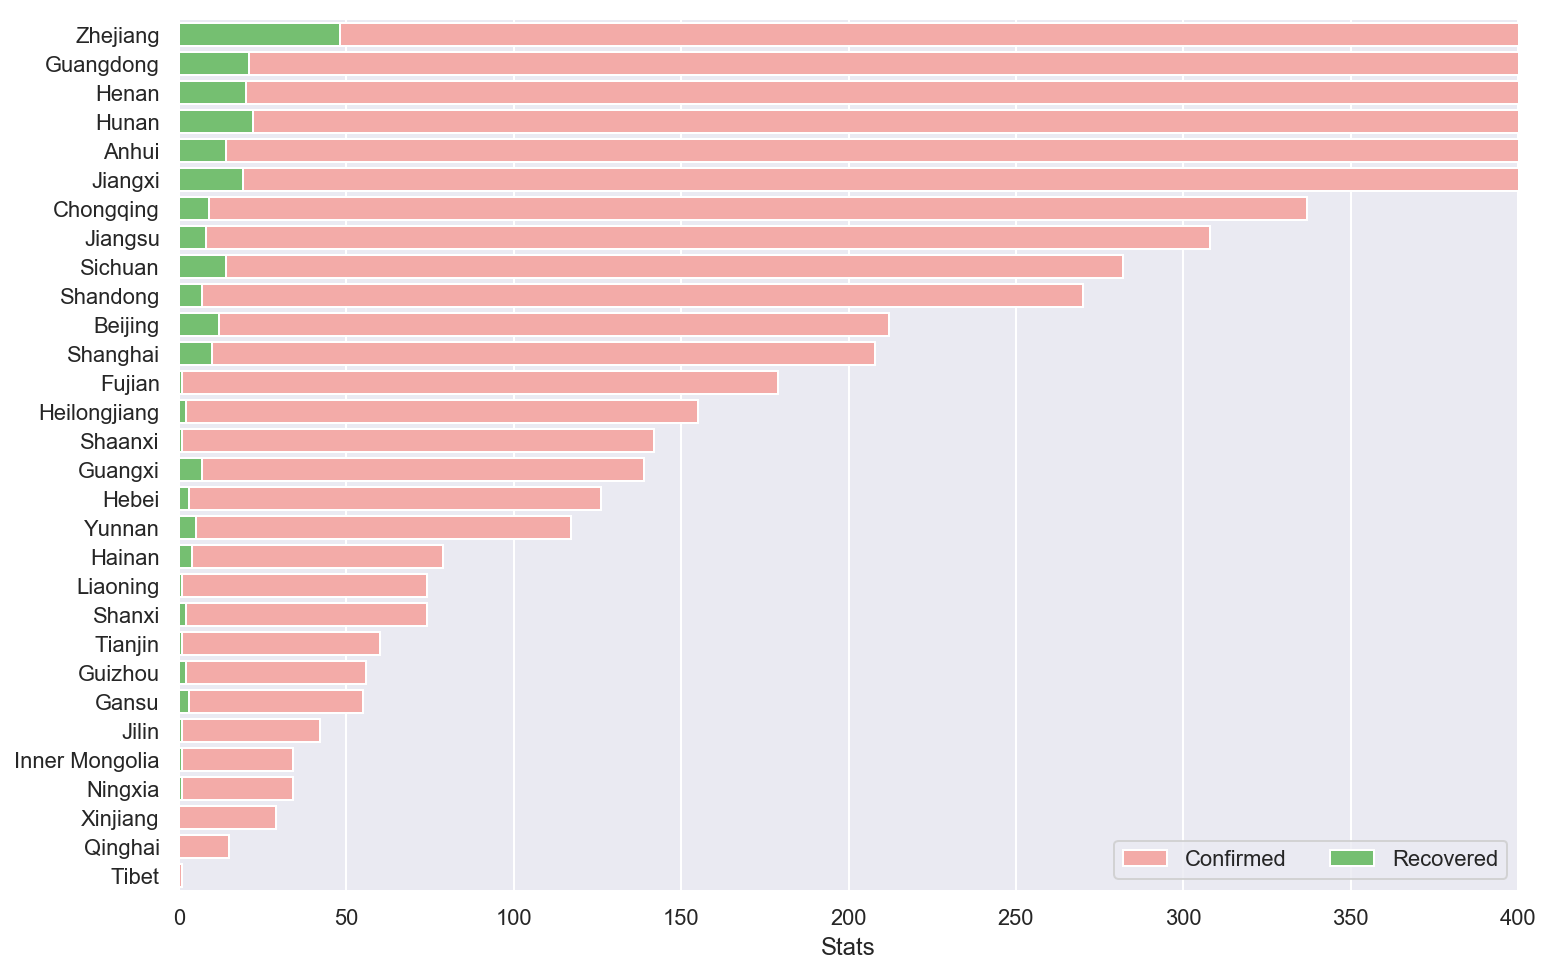

In [38]:
f, ax = plt.subplots(figsize=(12,8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:], label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:], label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,400), ylabel="", xlabel="Stats")
sns.despine(left=True, bottom=True)


Geographical Visualization the present condition of Mainland China

In [18]:
latitude = 39.91666667
longitude = 116.383333

# Create map and display it
china_map = folium.Map(location=[latitude, longitude],zoom_start=12)

china_coordinates = pd.read_csv("/Users/lihua/2019-nCov/input/novel-corona-virus-2019-dataset/China_states_coordinates.csv",)
china_coordinates.rename(columns={'States':'Province/State'}, inplace=True)
df_china_virus = China.merge(china_coordinates)

# Make a data frmae with dots to show on the map 
data = pd.DataFrame({
    'name':list(df_china_virus['Province/State']),
    'lat':list(df_china_virus['Latitude']),
    'lon':list(df_china_virus['Longitude']),
    'Confirmed':list(df_china_virus['Confirmed']),
    'Recovered':list(df_china_virus['Recovered']),
    'Deaths':list(df_china_virus['Deaths']),    
})

data.head()

,name,lat,lon,Confirmed,Recovered,Deaths
0,Hubei,30.52,114.31,13522.0,396.0,414.0
1,Zhejiang,30.26,120.19,829.0,48.0,0.0
2,Guangdong,23.16,113.23,797.0,21.0,0.0
3,Henan,34.76,113.65,675.0,20.0,2.0
4,Hunan,28.21,113.00,593.0,22.0,0.0


Total confirmed cases in China till date

In [19]:
# Create a map for total confirmed cases in Chinatill date
china_map1 = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Confirmed'], data['name']):
    folium.CircleMarker([lat,lon],
                        radius=13,
                        popup = ('Province: ' + str(name).capitalize() + '<br>' 
                        'Confirmed: ' + str(value) + '<br>'), 
                        color = 'red', 
                        
                        fill_color = 'red',
                        fill_opacity=0.7 ).add_to(china_map1)
    folium.Map(titles='jj', attr="attribution")
china_map1

Total deaths in China till date

In [20]:
china_map = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Deaths'], data['name']):
    folium.CircleMarker([lat,lon],
                        radius=value*0.2,
                        popup = ('Province: ' + str(name).capitalize() + '<br>' 
                        'Deaths: ' + str(value) + '<br>'), 
                        color = 'black', 
                        
                        fill_color = 'red',
                        fill_opacity=0.7 ).add_to(china_map)
    folium.Map(titles='jj', attr="attribution")
china_map

Total recovered cases in China

In [21]:
china_map2 = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Recovered'], data['name']):
    folium.CircleMarker([lat,lon],
                        radius=10,
                        popup = ('Province: ' + str(name).capitalize() + '<br>' 
                        'Recovered: ' + str(value) + '<br>'), 
                        color = 'green', 
                        
                        fill_color = 'green',
                        fill_opacity=0.7 ).add_to(china_map2)
    folium.Map(titles='jj', attr="attribution")
china_map2

# Next step
This is a starter exploration of the 2019-nCov cases dataset inspired by Parul Pandey (https://www.kaggle.com/parulpandey).  I am continuing to work on the dynamic growth trends of this outbreak.  

# Acknowledgements

Johns Hopkins university has made the data available in google sheets format here. Sincere thanks to them.

Thanks to WHO, CDC, NHC and DXY for making the data available in first place.

Picture courtesy : Johns Hopkins University dashboard

Inspiration
Some insights could be

Changes in number of affected cases over time
Change in cases over time at country level
Latest number of affected cases